In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [62]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"

# Load the dataset directly from the URL
data = pd.read_csv(url)

## Data Pre-Processing

In this section we will make our data ready for model training. This will include:

* Encode Categorical features using dummy encoding
* Encode Boolean variables using label encoder
* Split Data into train and test set
* Scale train set using the standard scaler

In [63]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head(3)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [64]:
# Check shape
data.shape

(12330, 18)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

***There are 2 Boolean, 2 Categorical and 14 Numeric Variables (7 Integers and 7 Float) in the dataset.***

In [66]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

***There are no missing values in the dataset***

In [67]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


* ***On average, users visit 2 Administrative pages and 31 Product Related Pages. However, there is very little to no engagement with the Informational pages.***

In [68]:
data.describe(include=['object', 'bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


* ***Dataset contains records of 10 unique months; May occurs most frequently.***
* ***There are 3 unique Visitor Types with returning visitor being the most common type; occuring 10,551 instances.***

### Exploratory Data Analysis

    ### Correlation Analysis

<Axes: >

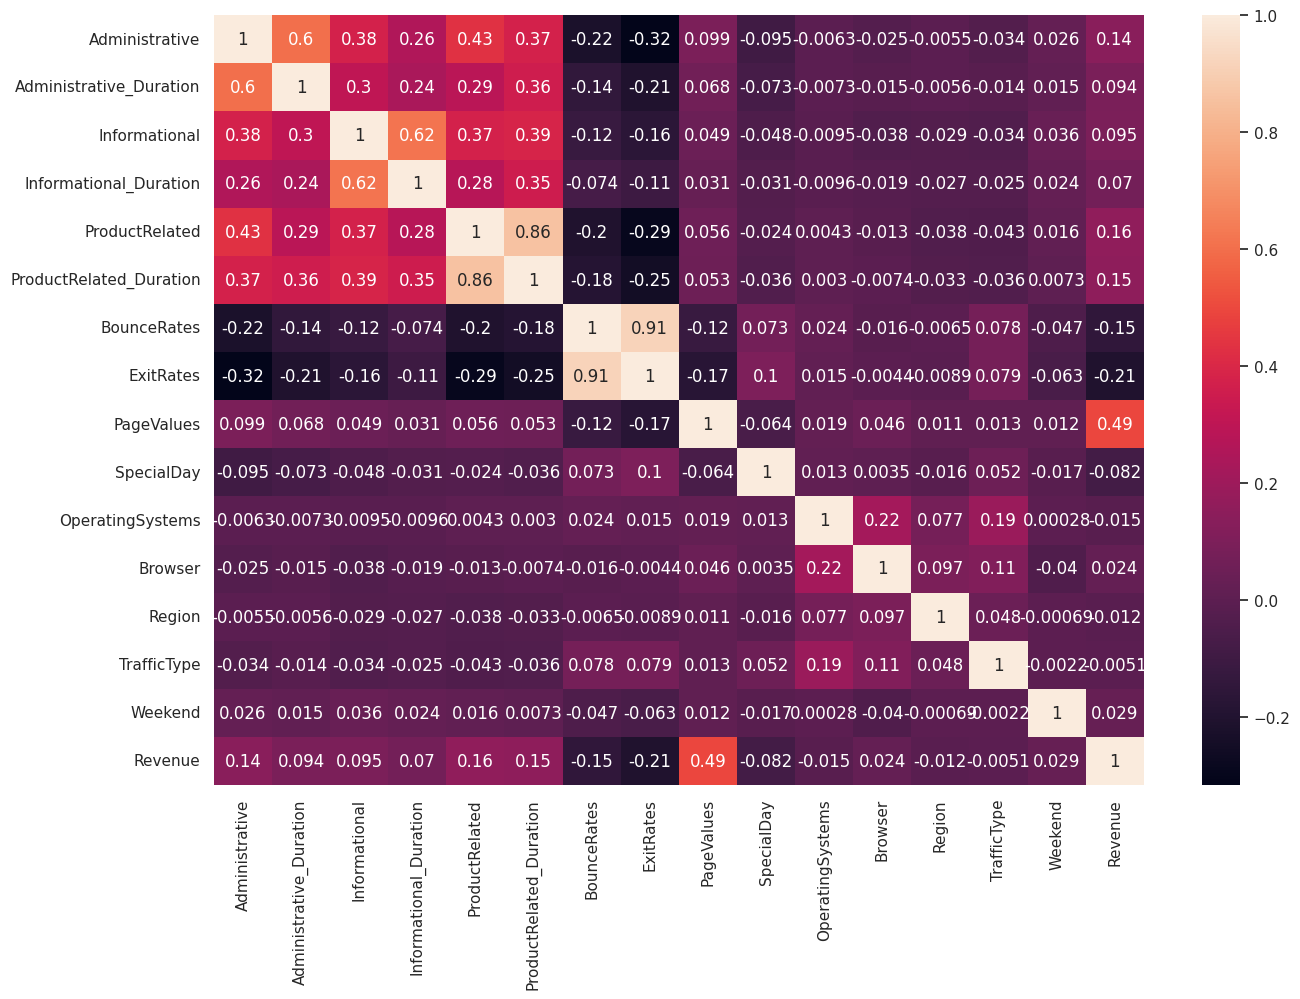

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

***The Heatmap shows there is little correlation among the different features with the exception of the following:***

- High correlation between:

        - BounceRates & ExitRates (0.91).
        - ProductRelated & ProductRelated_Duration (0.86).
- Moderate Correlations:

        - Administrative & Administrative DUration (0.6)
        - Informational and Informational Duration (0.62)
        - Page Values and Revenue (0.49)

## Page Matrix analysis:

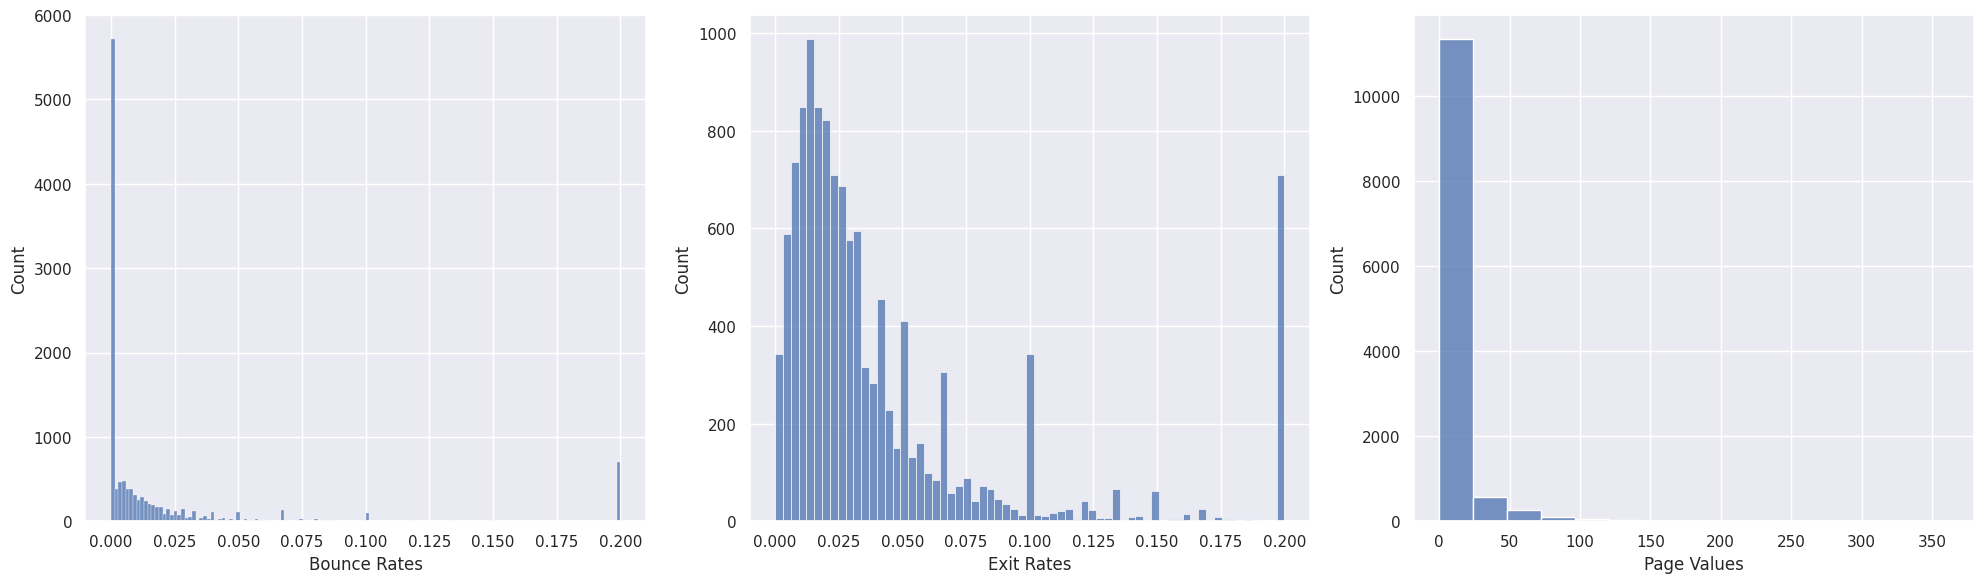

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data['BounceRates'], ax=axes[0])
axes[0].set_xlabel('Bounce Rates')

sns.histplot(data['ExitRates'], ax=axes[1])
axes[1].set_xlabel('Exit Rates')

sns.histplot(data['PageValues'], ax=axes[2])
axes[2].set_xlabel('Page Values')

plt.tight_layout()
plt.show()


The above distribution plots of Page Metrics show the following:

* All 3 features have distributions that are right skewed with a lot of outliers.
* The average bounce rate of most of our data points is low. This is a positive observation as high rates would identicate that visitors are not engaging with the website.
* Exit rates are higher in values than bounce rates. This is expected as we can assume that transaction confirmation pages will cause the average exit rate to increase.

## Revenue Analysis

In [71]:
data.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

0 represents False and 1 represents True

In [72]:
revenue_ratio = data.Revenue.value_counts(normalize=True)
revenue_ratio

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

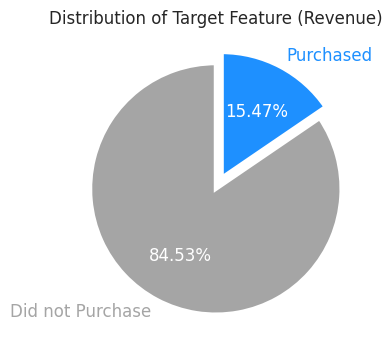

In [73]:
fig, ax = plt.subplots(figsize=(4, 4))

x=revenue_ratio

cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, len(x))))

colors[1]='dodgerblue'
labels = ['Did not Purchase','Purchased']

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},
    startangle=90,
    colors=colors,
    explode=(0, 0.1))

for i, patch in enumerate(patches):
   texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=300)
ax.set_title('Distribution of Target Feature (Revenue)', fontsize=12)
plt.tight_layout()

Imbalance in the output variable, where 84.53% didnot purchase.

Revenue by visitor type"

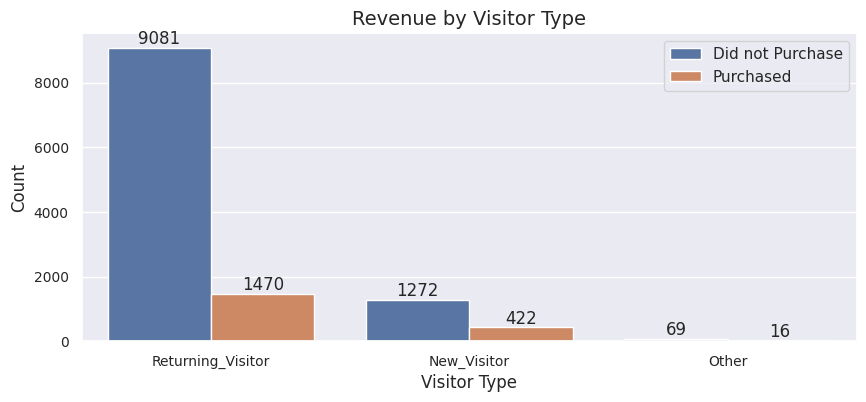

In [74]:
plt.figure(figsize=(10,4))
plt.title("Revenue by Visitor Type", fontsize=14)
ax = sns.countplot(x='VisitorType', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Visitor Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

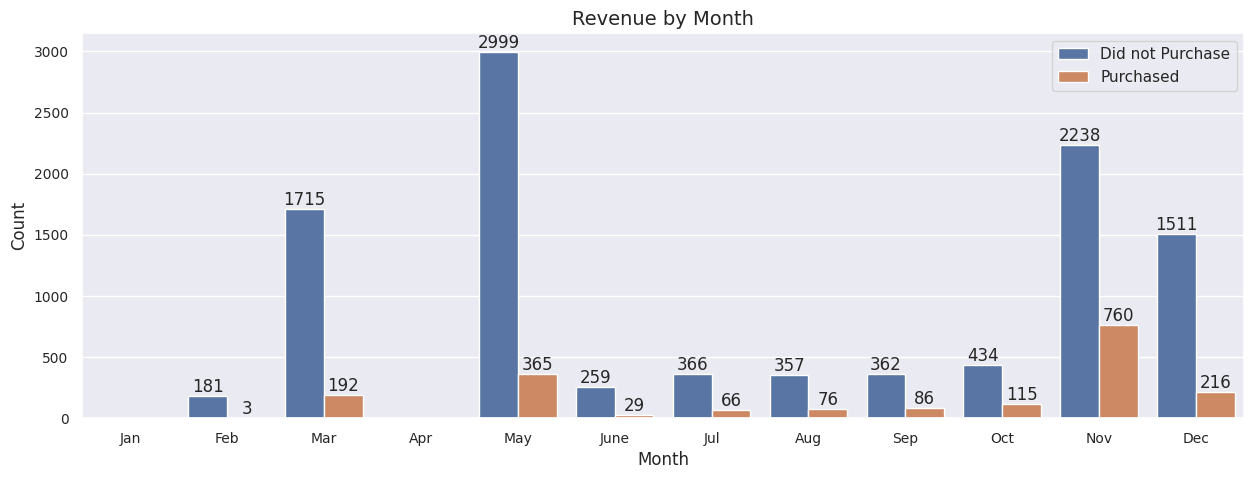

In [75]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Month", fontsize=14)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x='Month', data=data, hue = 'Revenue', order=orderlist)
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* No data found for January and April
* Lot of the transaction happned at the end of the year

Revenue by Special Day:


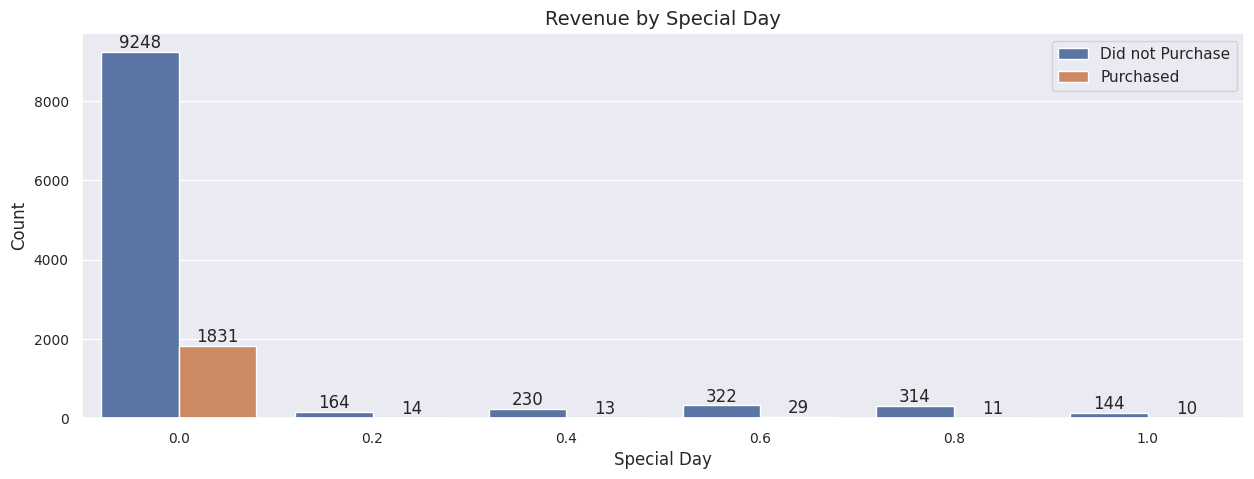

In [76]:
plt.figure(figsize=(15,5))
plt.title("Revenue by Special Day", fontsize=14)

ax = sns.countplot(x='SpecialDay', data=data, hue = 'Revenue')
ax.legend(labels=['Did not Purchase','Purchased'])
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Special Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

* ***There were significantly more website visitors and revenue generated (Completed purchases) on Special Day 0.0 in comparison to the other special days.***

Revenue by page type/ Duration

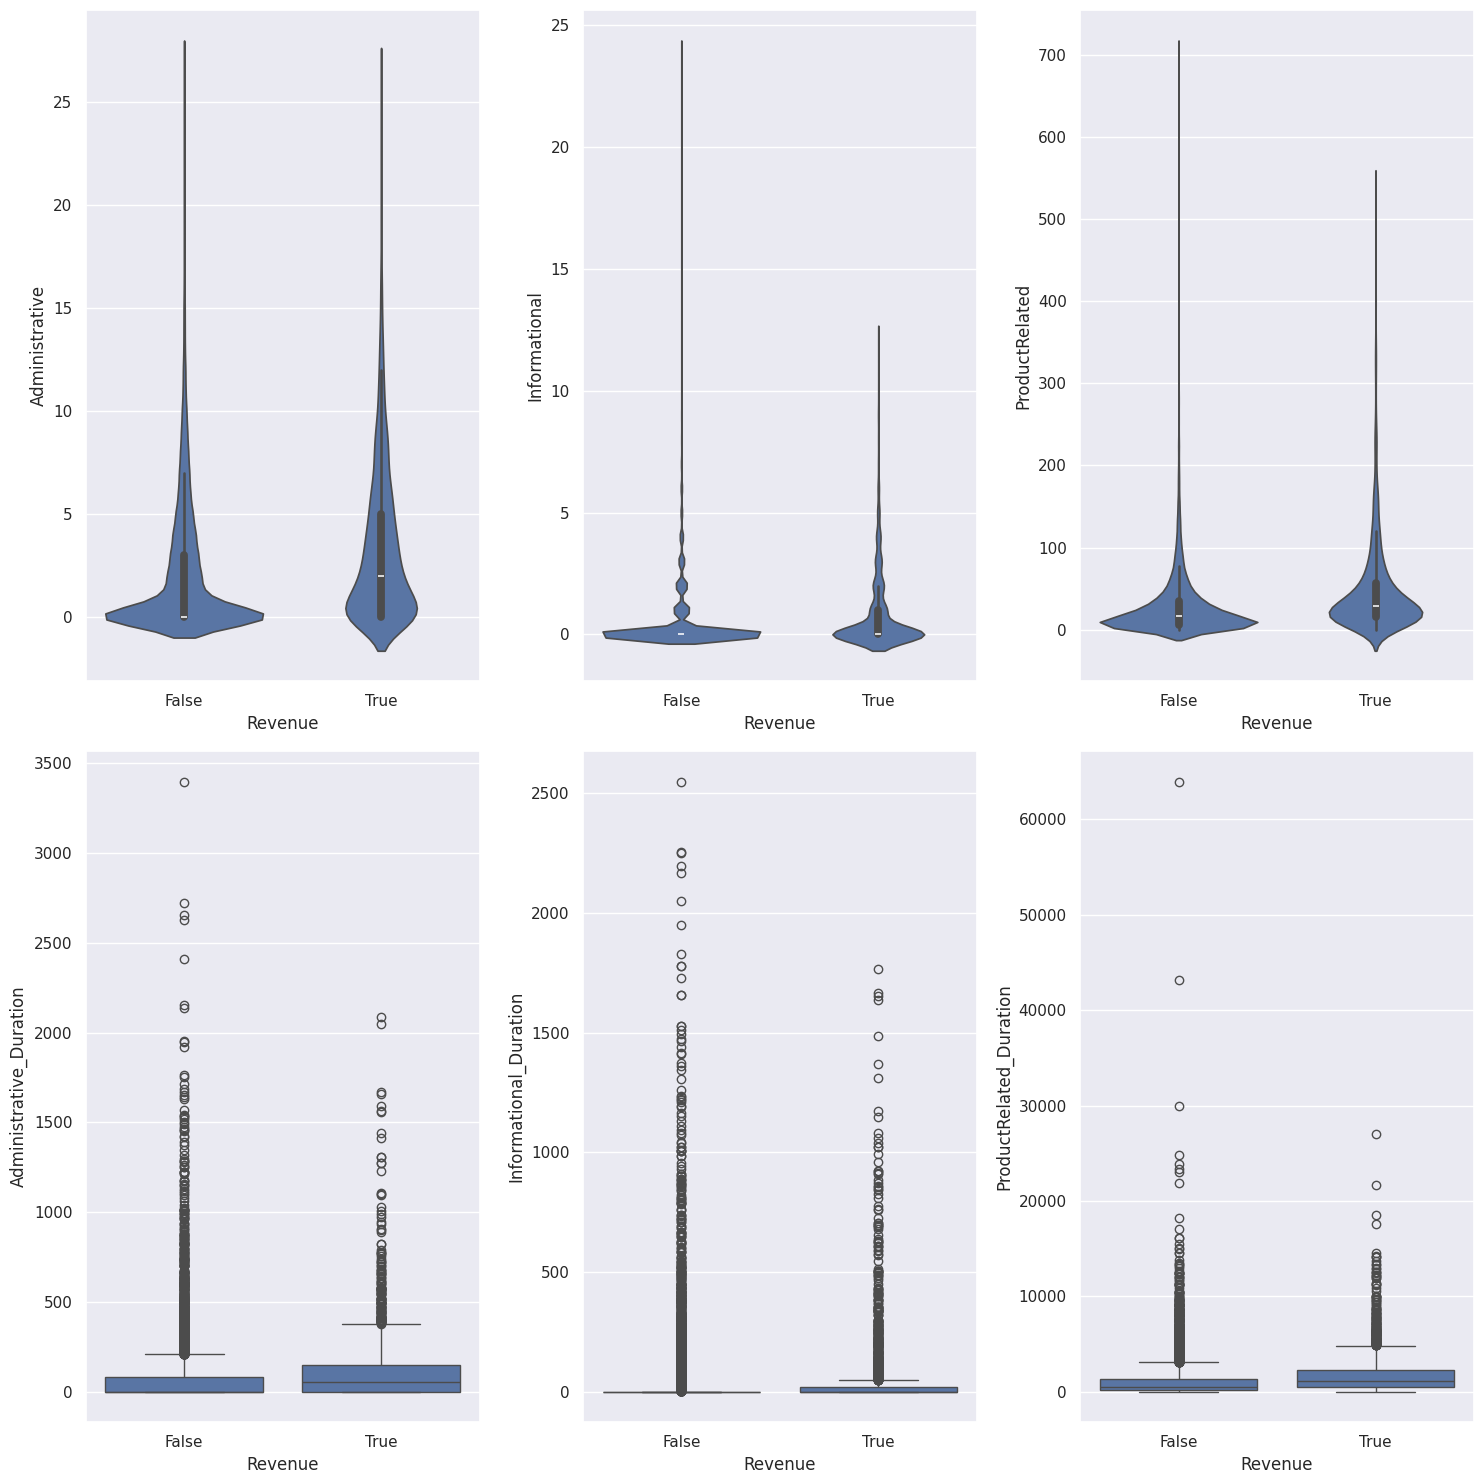

In [77]:
  fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

* ***Visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.***
* ***The number of product related pages visited and time spent on them is more than that for account related or informational pages.***

## Data Pre-Processing

In this section we will make our data ready for model training. This will include:

* Encode Categorical features using dummy encoding
* Encode Boolean variables using label encoder
* Split Data into train and test set
* Scale train set using the standard scaler

In [78]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head(3)

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [79]:
#Concactenante encoded features to dataset and drop non-encoded variables

data = pd.concat([data, encoded_features], axis=1)

data.drop(categorical, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [80]:
# Encode Boolean variables using label Encoder

le = LabelEncoder()

data['Revenue'] = le.fit_transform(data['Revenue'])
data['Weekend'] = le.fit_transform(data['Weekend'])

print(data.Revenue.value_counts())
print(data.Weekend.value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64
0    9462
1    2868
Name: Weekend, dtype: int64


### Select Target and Features

In [81]:
y = data['Revenue']
X = data.drop('Revenue', axis=1)

In [82]:
#Split Dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [83]:
#Scale train set using Standard scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [84]:
X_train_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
3688,-0.398768,-0.410011,-0.393761,-0.241045,-0.063304,-0.193787,-0.305156,-0.273276,0.250112,-0.310193,...,-0.19107,-0.157144,-0.425292,1.637253,-0.564015,-0.217249,-0.195265,-0.405153,-0.085749,0.417284
8981,-0.698312,-0.454118,-0.393761,-0.241045,-0.640802,-0.594893,-0.454182,-0.195848,-0.317186,-0.310193,...,-0.19107,-0.157144,-0.425292,-0.610779,-0.564015,-0.217249,-0.195265,-0.405153,-0.085749,0.417284
5794,-0.698312,-0.454118,-0.393761,-0.241045,-0.640802,-0.184500,-0.454182,-0.195848,-0.317186,-0.310193,...,-0.19107,-0.157144,-0.425292,-0.610779,-0.564015,-0.217249,5.121243,2.468204,-0.085749,-2.396449
11051,-0.698312,-0.454118,-0.393761,-0.241045,-0.640802,-0.557644,-0.454182,0.493970,-0.317186,-0.310193,...,-0.19107,-0.157144,-0.425292,-0.610779,1.773004,-0.217249,-0.195265,-0.405153,-0.085749,0.417284
6356,-0.698312,-0.454118,-0.393761,-0.241045,-0.574168,-0.576319,-0.454182,-0.471775,-0.317186,-0.310193,...,-0.19107,-0.157144,-0.425292,-0.610779,1.773004,-0.217249,-0.195265,2.468204,-0.085749,-2.396449


### Modelling

* Train and evaluate models. Predictive models that will be used are Logistic Regression, KNeighbors Classifier, SVM, Decision Tree and Random Forest Classifier.
* The Scaled Dataset would be used for :- Logistic Regression, KNN and SVM.
* The Unscaled Dataset would be used for :- Decision Tree and Random Forest Classifier.
* Hyperparameter Tuning for the model with the best performance to try to improve its performance further.
* Inspect Feature importance (Top 10 features)
* Evaluate with Cross Validation.

In [85]:
# Initialize models

LR = LogisticRegression()
KN = KNeighborsClassifier()
SV = SVC()
DC = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [86]:
def c_matrix_plot(y_test,prediction):

    c_matrix = confusion_matrix(y_test,prediction)
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Greens')

   # ax.set_title(f'Confusion Matix for {prediction.__class__.__name__}');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['Did not purchase', 'Purchased'])
    ax.yaxis.set_ticklabels(['Did not purchase', 'Purchased'])

    plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)



For Logistic Regression, Accuracy score is  0.8905109489051095
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3184
           1       0.70      0.37      0.49       515

    accuracy                           0.89      3699
   macro avg       0.80      0.67      0.71      3699
weighted avg       0.88      0.89      0.88      3699

[[3101   83]
 [ 322  193]]

	Confusion Matrix for Logistic Regression


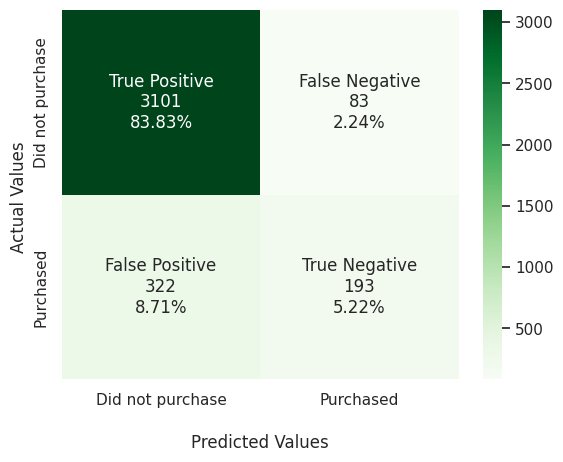


For KNeighbors, Accuracy score is  0.8778048121113815
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3184
           1       0.61      0.35      0.44       515

    accuracy                           0.88      3699
   macro avg       0.75      0.66      0.69      3699
weighted avg       0.86      0.88      0.86      3699

[[3068  116]
 [ 336  179]]

	Confusion Matrix for K-Nearest Neighbors


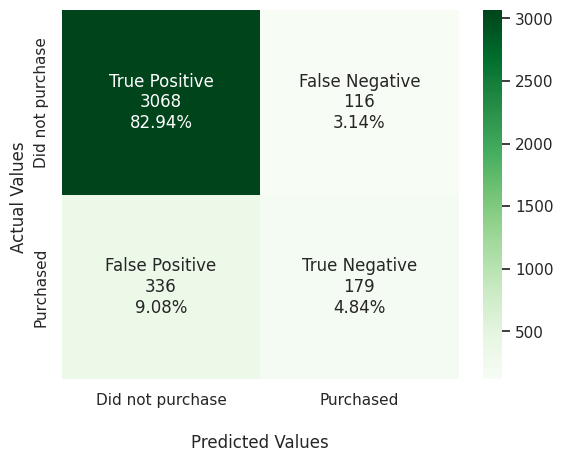


For SVM, Accuracy score is  0.8975398756420654
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3184
           1       0.71      0.45      0.55       515

    accuracy                           0.90      3699
   macro avg       0.81      0.71      0.75      3699
weighted avg       0.89      0.90      0.89      3699

[[3090   94]
 [ 285  230]]

	Confusion Matrix for SVM


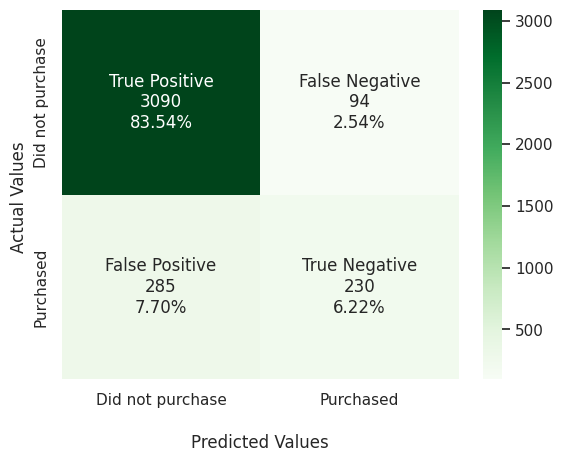

In [88]:
# For Logistic Regression, KNN and SVM, we will use the scaled dataset

LR = LogisticRegression()
LR = LR.fit(X_train_scaled, y_train)
LR_preds = LR.predict(X_test_scaled)
print('\nFor Logistic Regression, Accuracy score is ', accuracy_score(y_test,LR_preds))
print(classification_report(y_test, LR_preds))
print(confusion_matrix(y_test, LR_preds))
print('\n\tConfusion Matrix for Logistic Regression')
c_matrix_plot(y_test, LR_preds)

KN = KNeighborsClassifier()
KN = KN.fit(X_train_scaled, y_train)
KN_preds = KN.predict(X_test_scaled)
print('\nFor KNeighbors, Accuracy score is ', accuracy_score(y_test,KN_preds))
print(classification_report(y_test, KN_preds))
print(confusion_matrix(y_test, KN_preds))
print('\n\tConfusion Matrix for K-Nearest Neighbors')
c_matrix_plot(y_test, KN_preds)

SV = SVC()
SV = SV.fit(X_train_scaled, y_train)
SV_preds = SV.predict(X_test_scaled)
print('\nFor SVM, Accuracy score is ', accuracy_score(y_test,SV_preds))
print(classification_report(y_test, SV_preds))
print(confusion_matrix(y_test, SV_preds))
print('\n\tConfusion Matrix for SVM')
c_matrix_plot(y_test, SV_preds)


For Decision Tree Classifier, Accuracy score is  0.8650986753176534
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3184
           1       0.51      0.56      0.54       515

    accuracy                           0.87      3699
   macro avg       0.72      0.74      0.73      3699
weighted avg       0.87      0.87      0.87      3699

[[2912  272]
 [ 227  288]]

	Confusion Matrix for Decision Tree


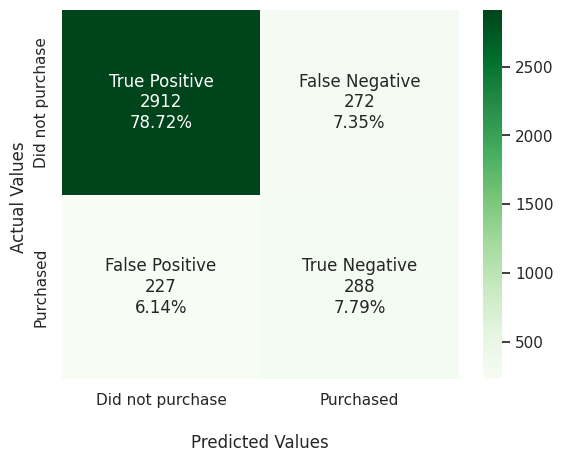


For Random Forest Classifier, Accuracy score is  0.9032170856988375
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3184
           1       0.68      0.57      0.62       515

    accuracy                           0.90      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.90      0.90      0.90      3699

[[3049  135]
 [ 223  292]]

	Confusion Matrix for Random Forest


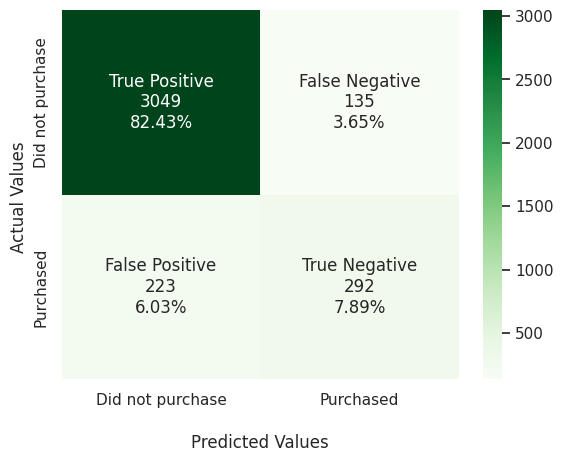

In [89]:
# For Decision Tree Classifier and Random Forest, we will use the unscaled dataset to train the models

DC = DecisionTreeClassifier()
DC = DC.fit(X_train, y_train)
DC_preds = DC.predict(X_test)
print('\nFor Decision Tree Classifier, Accuracy score is ', accuracy_score(y_test,DC_preds))
print(classification_report(y_test,DC_preds))
print(confusion_matrix(y_test,DC_preds))
print('\n\tConfusion Matrix for Decision Tree')
c_matrix_plot(y_test,DC_preds)

RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train)
RF_preds = RF.predict(X_test)
print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test,RF_preds))
print(classification_report(y_test,RF_preds))
print(confusion_matrix(y_test,RF_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test,RF_preds)

ROC Carve

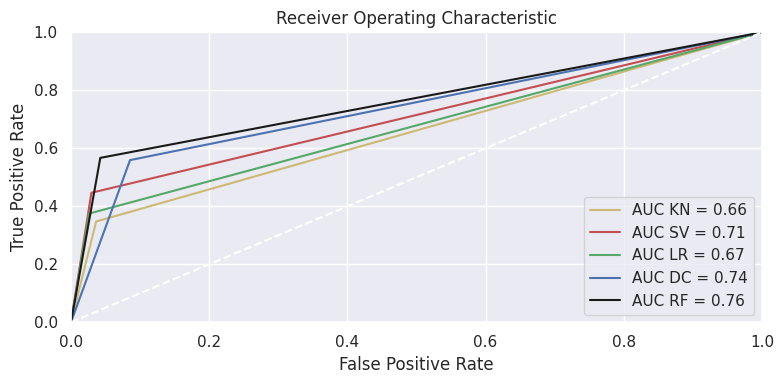

In [90]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fpr_kn, tpr_kn, threshold_kn = metrics.roc_curve(y_test, KN_preds)
roc_auc_kn = metrics.auc(fpr_kn, tpr_kn)
fpr_sv, tpr_sv, threshold_sv = metrics.roc_curve(y_test, SV_preds)
roc_auc_sv = metrics.auc(fpr_sv, tpr_sv)
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, LR_preds)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
fpr_dc, tpr_dc, threshold_dc = metrics.roc_curve(y_test, DC_preds)
roc_auc_dc = metrics.auc(fpr_dc, tpr_dc)
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, RF_preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)

fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_kn, tpr_kn, 'y', label = 'AUC KN = %0.2f' % roc_auc_kn)
plt.plot(fpr_sv, tpr_sv, 'r', label = 'AUC SV = %0.2f' % roc_auc_sv)
plt.plot(fpr_lr, tpr_lr, 'g', label = 'AUC LR = %0.2f' % roc_auc_lr)
plt.plot(fpr_dc, tpr_dc, 'b', label = 'AUC DC = %0.2f' % roc_auc_dc)
plt.plot(fpr_rf, tpr_rf, 'k', label = 'AUC RF = %0.2f' % roc_auc_rf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

### Hyper-Parameter Tuning - Random Forest

In [91]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(RF.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [92]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [93]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF,
                               param_distributions = random_grid,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)


In [94]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [95]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [96]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)


For Random Forest Classifier, Accuracy score is  0.9078129224114626
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3184
           1       0.72      0.56      0.63       515

    accuracy                           0.91      3699
   macro avg       0.82      0.76      0.79      3699
weighted avg       0.90      0.91      0.90      3699

[[3072  112]
 [ 229  286]]

	Confusion Matrix for Random Forest


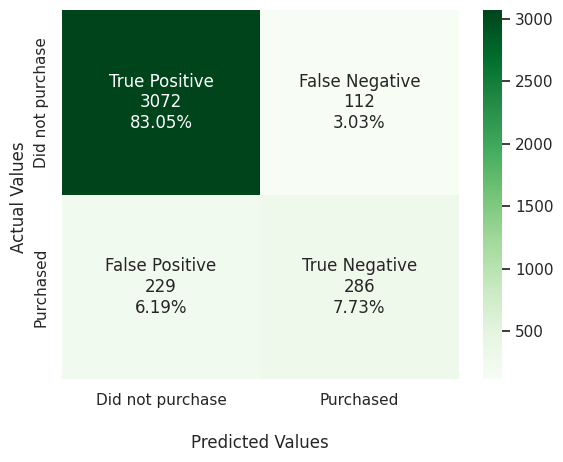

In [97]:
rf_random = RandomForestClassifier(n_estimators=1600,
                                   max_depth=10,
                                   min_samples_split=2,
                                   min_samples_leaf=4,
                                   max_features='sqrt',
                                   bootstrap=True)
rf_random.fit(X_train,y_train)
rf_random_preds = rf_random.predict(X_test)

print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test, rf_random_preds))
print(classification_report(y_test, rf_random_preds))
print(confusion_matrix(y_test, rf_random_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test, rf_random_preds)

### Inspect Feature Importance

In [ ]:
#get feature importances
RF_importances = pd.DataFrame(data = rf_random.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for Random Forest')
plt.show()

In [ ]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

### Evaluating with Cross Validation

In [103]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [104]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy:')
    print(accuracy_scores)
    print(model.__class__.__name__,'Mean Accuracy: %.3f' % (mean(accuracy_scores)))

    precision_scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    print('\nPrecision:')
    print(precision_scores)
    print(model.__class__.__name__,'Mean Precision: %.3f' % (mean(precision_scores)))

    recall_scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    print('\nRecall:')
    print(recall_scores)
    print(model.__class__.__name__,'Mean Recall: %.3f' % (mean(recall_scores)))

In [105]:
trainer_with_cv(rf_random,X,y)

Accuracy:
[0.9107867  0.91159773 0.89213301 0.90348743 0.90024331 0.918897
 0.90673155 0.90429846 0.90105434 0.89699919]
RandomForestClassifier Mean Accuracy: 0.905

Precision:
[0.74647887 0.74193548 0.73913043 0.77536232 0.75555556 0.8030303
 0.7443609  0.78231293 0.7826087  0.78873239]
RandomForestClassifier Mean Precision: 0.766

Recall:
[0.58888889 0.5380117  0.52763819 0.55440415 0.52331606 0.57923497
 0.55307263 0.57425743 0.54       0.53846154]
RandomForestClassifier Mean Recall: 0.552


***The cross validation result shows that the Random Forest Classifier is able to generalize to new data***

### Conclusion
* In this project, we trained models that can classify visitors to a store's website, and predict if they are likely to make a purchase on the website or not.
* Five (5) learning classifiers (Logistic Regression, KNN, SVM, Decision Tree and Random Forest) were tested.
* The Random Forest Classifier had the best performance with an accuracy of 90% and F-1 Score of 62%.
* The Page Values Feature was found to be the most important feature in determining the purchase intention of a website visitor. Other important features include the Exit rate, Bounce rate, type of pages visited as well as the duration spent on the pages.
* The cross validation result shows that the Random Forest Classifier is able to generalize to new data